In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob2

In [8]:
d=np.load("./preds_res/ddpm_500/run1/batch_0.npy",allow_pickle=True)[()]
inps=d["inps"]

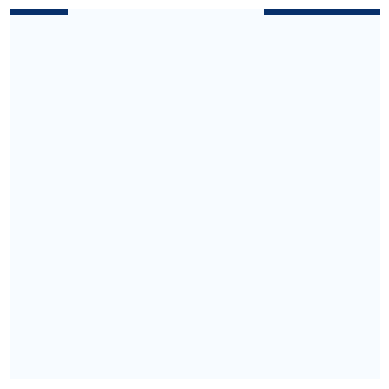

In [37]:
geo=inps[250][1]
plt.imshow(geo,cmap="Blues")
plt.axis("off")
plt.savefig("./images/bc.png",bbox_inches="tight",pad_inches=0)


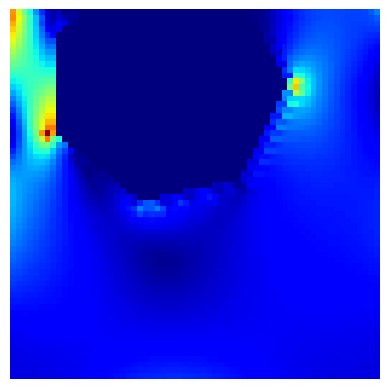

In [43]:
target= d["target"][250][0]    
plt.imshow(target,cmap="jet")
plt.axis("off")
plt.savefig("./images/res_hyp.png",bbox_inches="tight",pad_inches=0)

# barplot

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob2
import h5py
import h5py
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# res=h5py.File(sparse_res[0],'r')

# preds=res["pred_s_runs_0"]
# targets=res["target_s_runs_0"]

In [2]:
def MAE(a,b):
    return mean_absolute_error(a,b)

def MSE(a,b):
    ms=mean_squared_error(a,b)
    # plt.plot(ms)
    # plt.show()
    return ms

def PMAE(a, b):
    min_b = np.abs(np.amin(b, axis=-1))
    max_b = np.abs(np.amax(b, axis=-1))
    range_ = max_b-min_b
    expand_max_b = np.tile(np.expand_dims(range_, axis=-1), (1, np.shape(b)[-1]))
    new_a = np.divide(a, expand_max_b+1e-6)
    new_b = np.divide(b, expand_max_b+1e-6)
    pmae = mean_absolute_error(new_a, new_b)

    return pmae

def PAE(a, b):
    a_max = np.abs(np.amax(a, axis=-1))
    b_max = np.abs(np.amax(b, axis=-1))

    return mean_absolute_error(a_max, b_max)

def PPAE(a, b):
    a_max = np.abs(np.amax(a, axis=-1))
    b_max = np.abs(np.amax(b, axis=-1))
    new_a_max = np.divide(a_max, (b_max+(0.00000000001)))
    plt.plot(new_a_max)
    plt.show()
    
    return mean_absolute_error(new_a_max, np.ones(np.shape(new_a_max)))

In [3]:
res_list=glob2.glob("./preds_res/**.hdf5")


In [5]:

print(res_list)

d_rs32_scaled={}


time_list=[[500,24.730620],[250,12.1653275],[100,5.05112],[50,2.46689]]
time_list=np.array(time_list)
# # print(time_list)

        
for i in res_list:
    with h5py.File(i,"r") as data:
        # print(data.keys())
        time_step=i.split("/")[-1].split(".")[0].split("_")[-2]
        print(time_step)

        mael=[]
        mse_l=[]
        pmae_l=[]
        pae_l=[]

        for i in range(3):
                
                pred_s=data["pred_s_runs_"+str(i)][:].squeeze()
                target_s=data["target_s_runs_"+str(i)][:].squeeze()
    
                pred_s_reshaped=pred_s.reshape(-1,64*64)
                target_s_reshaped=target_s.reshape(-1,64*64)
    
                # print(pred_s_reshaped.shape)
    
                mael.append(MAE(pred_s_reshaped,target_s_reshaped))
                mse_l.append(MSE(pred_s_reshaped,target_s_reshaped))
                pmae_l.append(PMAE(pred_s_reshaped,target_s_reshaped))
                pae_l.append(PAE(pred_s_reshaped,target_s_reshaped))


        mae_mean_l=np.mean(mael,axis=0)
        mae_std_l=np.std(mael)

        mse_mean_l=np.mean(mse_l,axis=0)
        mse_std_l=np.std(mse_l)

        pmae_mean_l=np.mean(pmae_l,axis=0)
        pmae_std_l=np.std(pmae_l)

        pae_mean_l=np.mean(pae_l,axis=0)
        pae_std_l=np.std(pae_l)


        # mae_mean_p=np.mean(mael_p)

        d_rs32_scaled[int(time_step)]={"mae_mean":mae_mean_l,"mae_std":mae_std_l}

        print("MAE: ",mae_mean_l,mae_std_l)
        print("MSE: ",mse_mean_l,mse_std_l)
        print("PMAE: ",pmae_mean_l,pmae_std_l)
        print("PAE: ",pae_mean_l,pae_std_l)
        

        print("")
        

['./preds_res/results_hyper_64_ddpm_50_runs.hdf5', './preds_res/results_hyper_64_ddpm_100_runs.hdf5', './preds_res/results_hyper_64_ddpm_250_runs.hdf5', './preds_res/results_hyper_64_ddpm_500_runs.hdf5']
50
MAE:  1.4942719 0.0018522309
MSE:  271.22702 0.13501444
PMAE:  0.000493193 2.442802e-07
PAE:  9.828132 0.017971292

100
MAE:  1.5122887 0.013332836
MSE:  252.72548 26.387466
PMAE:  0.00050292193 2.0258244e-06
PAE:  9.87674 0.004347246

250
MAE:  1.5682492 0.0041670706
MSE:  271.63828 0.17099628
PMAE:  0.0005211891 1.54579e-06
PAE:  9.995425 0.039306067

500
MAE:  1.5818415 0.004555727
MSE:  234.85596 26.311415
PMAE:  0.0005327501 5.541906e-07
PAE:  10.181914 0.030103508



# timer boi

In [21]:
time_list=[[500,17.383305311203003],[250,9.389532327651978],[100,4.357517719268799],[50,2.745697259902954]]
time_list=np.array(time_list)

# Box plot

In [9]:
res_list

['./preds_res/results_hyper_64_ddpm_50_runs.hdf5',
 './preds_res/results_hyper_64_ddpm_100_runs.hdf5',
 './preds_res/results_hyper_64_ddpm_250_runs.hdf5',
 './preds_res/results_hyper_64_ddpm_500_runs.hdf5']

In [10]:
d_rs32_scaled={}

for i in res_list:

    data=h5py.File(i,"r")
    print(data.keys())
    print(i)

    time_step=i.split("/")[-1].split(".")[0].split("_")[-2]
    print(time_step)

    name=i.split("/")[-1].split(".")[0].split("_")[0:2]
    # print(name)

    name="_".join(name)
    

    mael=[]
    msel=[]

    mae_list_persample=[]

    for i in range(0,3):
        # pred_s=data[name+"_run"+str(i)][:].squeeze()
        # target_s=data[name+"_run"+str(i)+"_target"][:].squeeze()
        pred_s=data["pred_s_runs_"+str(i)][:].squeeze()
        target_s=data["target_s_runs_"+str(i)][:].squeeze()

        pred_n_reshaped=pred_s.reshape(-1,64*64)
        target_n_reshaped=target_s.reshape(-1,64*64)

        # print(pred_n_reshaped.shape)
        ma=np.mean(np.abs(pred_n_reshaped-target_n_reshaped),axis=1)
        # print(ma.shape)
        mael.append(ma)

        mse=np.mean(np.square(pred_n_reshaped-target_n_reshaped),axis=1)
        msel.append(mse)
    
        
    mae_mean_l=np.mean(mael,axis=0)
    mse_mean_l=np.mean(msel,axis=0)

    print(mae_mean_l.shape)

    d_rs32_scaled[int(time_step)]={"mae_mean":mae_mean_l}

    print("MAE: ",mae_mean_l)
    # print("MSE: ",mse_mean_l,mse_std_l)

    
    print("")

<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
./preds_res/results_hyper_64_ddpm_50_runs.hdf5
50
(9950,)
MAE:  [2.2454271  0.7890555  0.41781723 ... 2.1456928  1.4376472  2.157272  ]

<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
./preds_res/results_hyper_64_ddpm_100_runs.hdf5
100
(9950,)
MAE:  [1.3006951  0.79380417 0.5391653  ... 1.1078757  2.1719465  1.0968716 ]

<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
./preds_res/results_hyper_64_ddpm_250_runs.hdf5
250
(9950,)
MAE:  [0.61846054 0.675752   1.1401147  ... 1.5351633  0.5730165  2.0355997 ]

<KeysViewHDF5 ['pred_s_runs_0', 'pred_s_runs_1', 'pred_s_runs_2', 'target_s_runs_0', 'target_s_runs_1', 'target_s_runs_2']>
./preds_res/results_hyper_64_ddpm_500_runs.hdf5
500
(9950,)
MAE:  [0.5943601  1.4660133  

In [11]:
bxp=[d_rs32_scaled[50]["mae_mean"],d_rs32_scaled[100]["mae_mean"],d_rs32_scaled[250]["mae_mean"],d_rs32_scaled[500]["mae_mean"] ]

bxp=np.array(bxp)
bxp

array([[2.2454271 , 0.7890555 , 0.41781723, ..., 2.1456928 , 1.4376472 ,
        2.157272  ],
       [1.3006951 , 0.79380417, 0.5391653 , ..., 1.1078757 , 2.1719465 ,
        1.0968716 ],
       [0.61846054, 0.675752  , 1.1401147 , ..., 1.5351633 , 0.5730165 ,
        2.0355997 ],
       [0.5943601 , 1.4660133 , 1.3731681 , ..., 1.0293509 , 0.92973155,
        1.2945665 ]], dtype=float32)

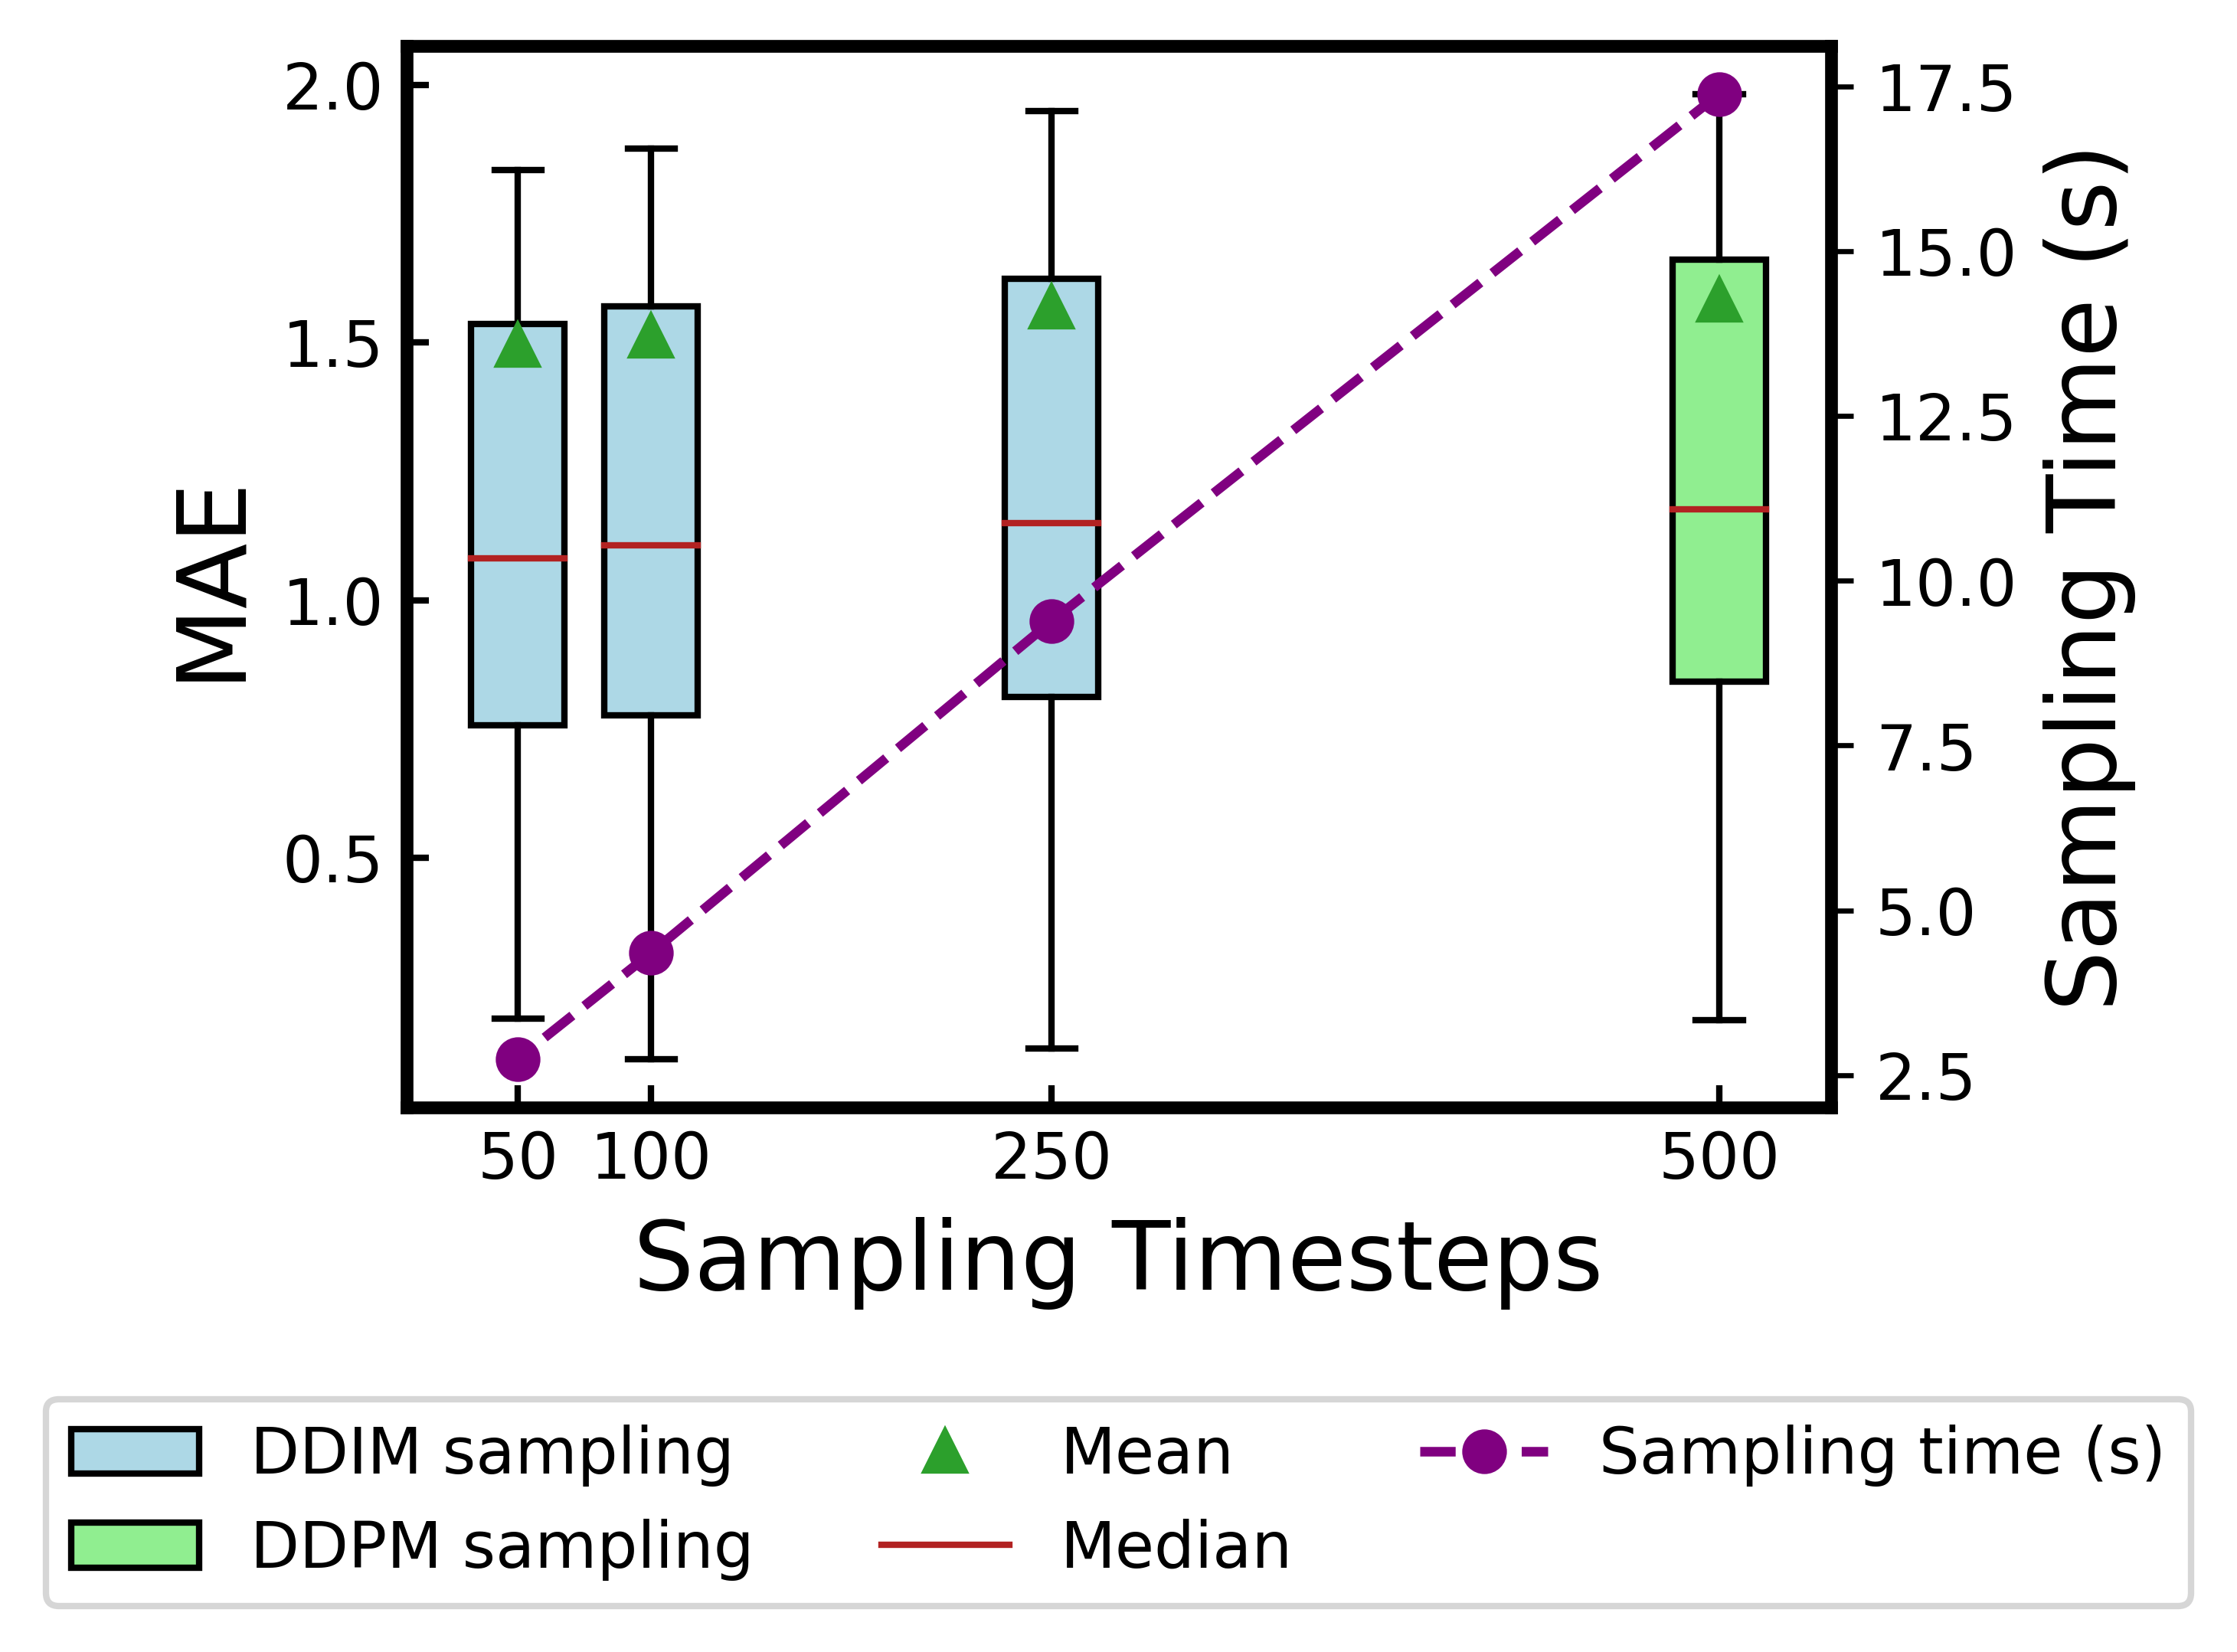

In [23]:
plt.rcParams["axes.linewidth"] = 2

fig = plt.figure(figsize = [4,3], dpi = 600)
width = 0.35
ax=plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(width)
tick_width = 1
plt.tick_params(direction = 'in', width = tick_width)
# sns.boxplot(data=bxp.T,ax=ax,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"},showfliers=False,whis=[0,99],medianprops={"color":"firebrick"},ax=ax)

bb2=ax.boxplot(bxp.T,showmeans=True,showfliers=False,whis=[0,85],medianprops={"color":"firebrick"},vert=True,patch_artist=True,positions=[50,100,250,500],widths=35)
ax.set_xticklabels([50,100,250,500])

colors = ['lightblue', 'lightblue', 'lightblue', 'lightgreen']
for patch, color in zip(bb2['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel("MAE",fontsize=15)
ax.set_xlabel("Sampling Timesteps",fontsize=15)

ax2=ax.twinx()
tim=ax2.plot(time_list[:,0],time_list[:,1],color="purple",label="Sampling Time(s)",marker="o",linestyle="dashed")
ax2.set_ylabel("Sampling Time (s)",fontsize=15)
ax2.yaxis.set_tick_params(labelsize=10)


plt.legend([bb2["boxes"][0],bb2["boxes"][3],bb2["means"][0],bb2["medians"][0],tim[0]],["DDIM sampling","DDPM sampling","Mean","Median","Sampling time (s)"],fontsize=10,ncol=3,loc="lower center",bbox_to_anchor=(0.5,-0.5))
plt.savefig("./images/boxplot_hyper.png",bbox_inches="tight",pad_inches=0)

In [17]:
tl=np.array(time_list)

In [18]:
tl[:,0]

array([500., 250., 100.,  50.])